# Predict which employees are going to leave (Probability)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv(r"D:\ALL Projects\1ML\Employee_Turnover_Prediction\employee_data.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Categorical to numrical

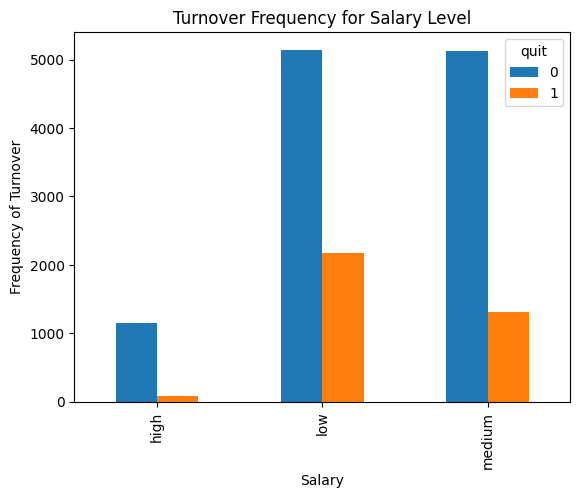

In [3]:
pd.crosstab(df.salary, df.quit).plot(kind='bar')
plt.title('Turnover Frequency for Salary Level')
plt.xlabel('Salary')
plt.ylabel('Frequency of Turnover')
plt.show()

pd.crosstab(df.salary, df.quit)

Creates a frequency table (cross-tabulation) between:

df.salary (e.g., salary levels such as Low, Medium, High)

df.quit (e.g., employee quit status: Yes/No)

It counts how many employees of each salary group quit or did not quit.

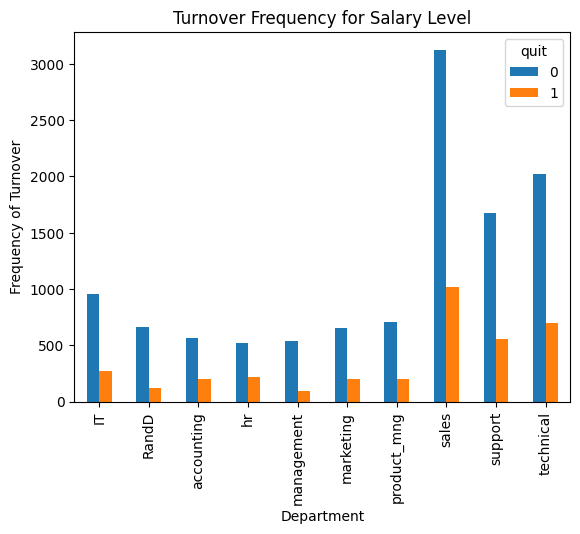

In [4]:
pd.crosstab(df.department, df.quit).plot(kind='bar')
plt.title('Turnover Frequency for Salary Level')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')

plt.show()

In [5]:
# ## OHE ----> One Hot Encoding
# cat_columns = ['department', 'salary']

# for col in cat_columns:
#     cat_list = 'col' + '_'+ col ## new column name 
#     cat_list = pd.get_dummies(df[col], prefix=col)
#     df1 = df.join(cat_list)
#     df = df1

In [6]:
df = pd.get_dummies(df, columns=['department', 'salary'], drop_first=True)


In [7]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,False,False,False,False,False,False,False,True,False,True,False


In [8]:
df.columns
# department and salary are converted to numerical columns using One Hot Encoding

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

# Data Visualization

C:\Users\SAIMON\AppData\Local\Temp\ipykernel_13600\1989795689.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'quit', data=df, palette='coolwarm')


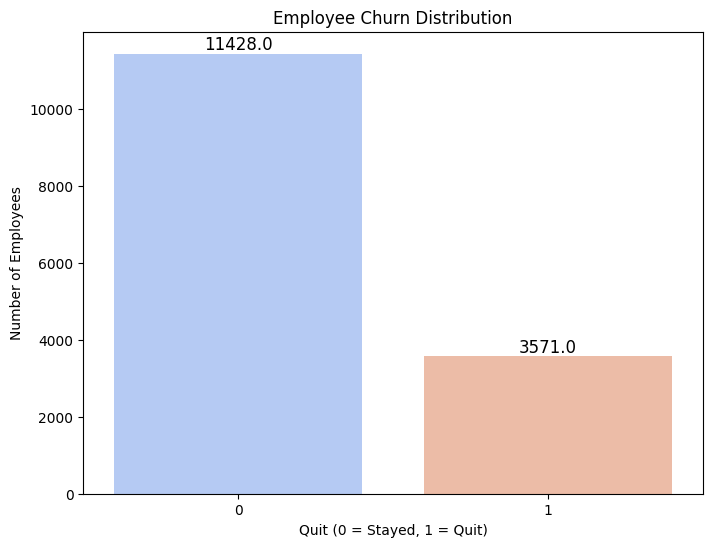

In [9]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'quit', data=df, palette='coolwarm')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width()/2., height), 
                ha='center', va='bottom', fontsize=12)

plt.title('Employee Churn Distribution')
plt.xlabel('Quit (0 = Stayed, 1 = Quit)')
plt.ylabel('Number of Employees')
plt.show()


# Train Test Split 

In [10]:
X = df.drop('quit', axis=1)
Y = df['quit']
X.shape, Y.shape

((14999, 18), (14999,))

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11999, 18), (3000, 18), (11999,), (3000,))

# DT with experimental parameter ( without changing code )

In [12]:
from ipywidgets import interact, IntSlider,Dropdown
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import display, Image
from graphviz import Source
from sklearn import tree
from IPython.display import display
@interact
def plot_tree(
    crit = ['gini', 'entropy'],
    split = ['best', 'random'],
    depth = IntSlider(min=1, max=10, step=1, value=3, continuous_update=False),
    min_samp_split = IntSlider(min=2, max=10, step=1, value=2, continuous_update=False),
    min_samp_leaf = IntSlider(min=1, max=10, step=1, value=1, continuous_update=False)):
    
    estimator = DecisionTreeClassifier(
        criterion=crit,
        splitter=split,
        max_depth=depth,
        min_samples_split=min_samp_split,
        min_samples_leaf=min_samp_leaf)
    
    
    estimator.fit(x_train, y_train)
    
    print(f"Training Accuracy: {estimator.score(x_train, y_train)*100:.2f}%")
    print(f"Testing Accuracy: {estimator.score(x_test, y_test)*100:.2f}%")
    
    
    
    graph = Source(tree.export_graphviz(estimator,
                                        out_file=None,
                                        feature_names=x_train.columns,
                                        class_names=['0', '1'],
                                        filled = True))
    
    display(Image(data=graph.pipe(format='png')))
    
    return estimator


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# Interactive Random forest classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

@interact
def plot_tree_rf(crit=["gini", "entropy"],
                 bootstrap=[True,],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator = RandomForestClassifier(random_state=1,
                                       criterion=crit,
                                       bootstrap=bootstrap,
                                       n_estimators=forests,
                                       max_depth=depth,
                                       min_samples_split=min_split,
                                       min_samples_leaf=min_leaf,
                                       n_jobs=-1,
                                      verbose=False).fit(x_train, y_train)

    print(f"Training Accuracy: {estimator.score(x_train, y_train)*100:.2f}%")
    print(f"Testing Accuracy: {estimator.score(x_test, y_test)*100:.2f}%")
    num_tree = estimator.estimators_[0]
    print('\nVisualizing Decision Tree:', 0)
    
    graph = Source(tree.export_graphviz(num_tree,
                                        out_file=None,
                                        feature_names=x_train.columns,
                                        class_names=['0', '1'],
                                        filled = True))
    
    display(Image(data=graph.pipe(format='png')))
    
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…